In [3]:
import pydicom as pdc
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
import glob

### EDA
- 나이와 암 진단의 상관관계
- 성별과 암 진단과의 상관관계
- 조영증강 영상 단계와 암 진단의 상관관계

#### 아이디어
- 나이(20대, 30대,. 또는 청년(19-34)/장년(35-49)/중년(50-64)/노년(65-))와 phase를 묶은 feature 관 암 진단의 상관관계

In [4]:
path = '../Code/benchmark_liver_tumor/raw/'

patient_meta = pd.read_csv(path + 'patient_meta.csv')
patient_meta = patient_meta[['RANDOM_PT_NO','SEX','AGE','PHASE',"DX"]]

#NET, Lymphoma : Dropped (3 cases)
#print("Drop:", patient_meta[(patient_meta['DX']=='lymphoma') | (patient_meta['DX']=='NET')].index)
#patient_meta = patient_meta.drop(patient_meta[(patient_meta['DX']=='lymphoma') | (patient_meta['DX']=='NET')].index, axis=0)
#patient_meta.reset_index(drop=True, inplace=True)

'''
# age_group변수 생성
# 0 : 19-34 (청년)
# 1: 35-49 (장년)
# 2: 50-64(중년)
# 3: 65-  (노년)
patient_meta['ageGroup'] = 0
for num in range(patient_meta.shape[0]):
    if(19 <= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <= 34):
        patient_meta.iloc[num,5] = 0 
    elif(35<= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=49):
        patient_meta.iloc[num,5] = 1 
    elif(50<=patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=64):
        patient_meta.iloc[num,5] = 2 
    elif(65<=patient_meta.iloc[num,2]):
        patient_meta.iloc[num,5] = 3 
    else:
        patient_meta.iloc[num,5] = -1 
        
# ageGroup_phase
for num in range(patient_meta.shape[0]):
    if(patient_meta.iloc[num,5])
'''
 

"\n# age_group변수 생성\n# 0 : 19-34 (청년)\n# 1: 35-49 (장년)\n# 2: 50-64(중년)\n# 3: 65-  (노년)\npatient_meta['ageGroup'] = 0\nfor num in range(patient_meta.shape[0]):\n    if(19 <= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <= 34):\n        patient_meta.iloc[num,5] = 0 \n    elif(35<= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=49):\n        patient_meta.iloc[num,5] = 1 \n    elif(50<=patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=64):\n        patient_meta.iloc[num,5] = 2 \n    elif(65<=patient_meta.iloc[num,2]):\n        patient_meta.iloc[num,5] = 3 \n    else:\n        patient_meta.iloc[num,5] = -1 \n        \n# ageGroup_phase\nfor num in range(patient_meta.shape[0]):\n    if(patient_meta.iloc[num,5])\n"

###  암 진단 분포

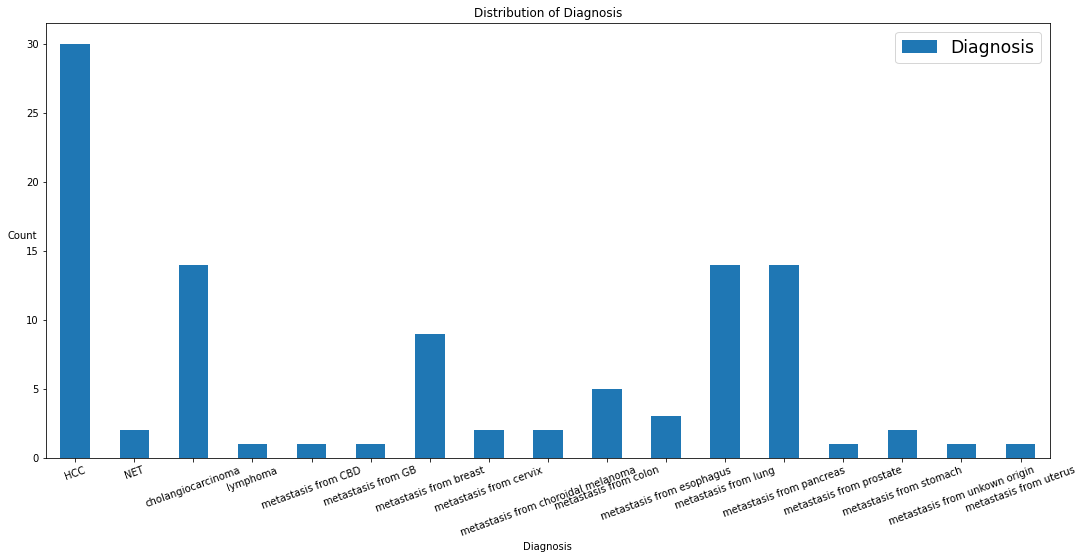

In [5]:
f, ax = plt.subplots(1,1, figsize=(18,8))

patient_meta[['DX']].groupby(patient_meta['DX']).count().plot.bar(ax=ax,rot=20)
ax.set_title("Distribution of Diagnosis")
ax.set_ylabel('Count',rotation=0)
ax.set_xlabel('Diagnosis')
ax.legend(['Diagnosis'], loc = 'upper right',fontsize='xx-large')


#### 암 진단 분석
- HCC(Hepatocellular carcinoma) 의 암진단률이 가장 높다,
- 다양한 Metastasis (암 전이)를 하나로 취합해서 확인하기 

In [6]:
import seaborn as sns

path = '../Code/benchmark_liver_tumor/raw/'
patient_meta = pd.read_csv(path + 'patient_meta.csv')
patient_meta = patient_meta[['RANDOM_PT_NO','SEX','AGE','PHASE',"DX"]]

# Diagnosis
# 0 : Metastasis : 전이
# 1 : Hepatocelluar Carcinoma : 간세포암
# 2 : cholangiocarcinoma : 담관암
for r in range(patient_meta.shape[0]):
    if('metastasis' in patient_meta.iloc[r, 4]):
        patient_meta.iloc[r, 4] = 0
    elif('HCC' == patient_meta.iloc[r, 4]):
        patient_meta.iloc[r, 4] = 1
    elif('cholangiocarcinoma' == patient_meta.iloc[r, 4]):
        patient_meta.iloc[r, 4] = 2
    else:
        patient_meta.iloc[r, 4] = -1

### 진단별 나이분포도

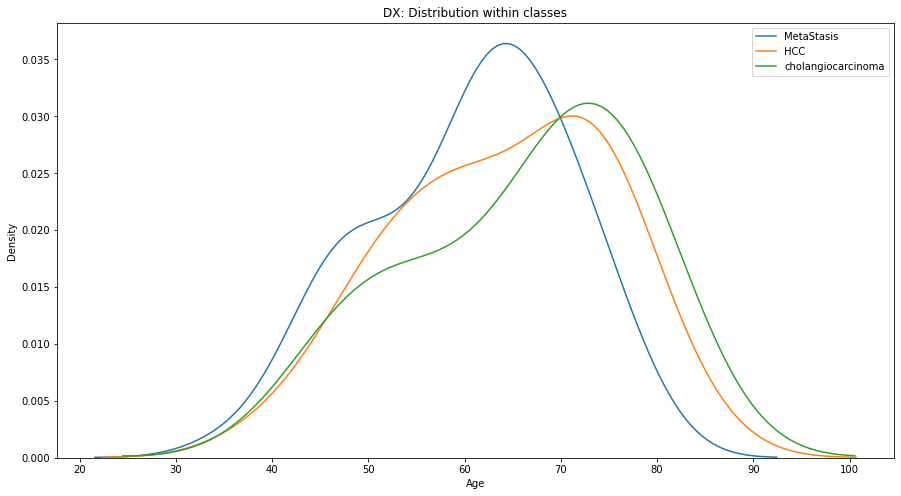

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.kdeplot(patient_meta[patient_meta['DX'] == 0]['AGE'], ax= ax)
sns.kdeplot(patient_meta[patient_meta['DX'] == 1]['AGE'], ax= ax)
sns.kdeplot(patient_meta[patient_meta['DX'] == 2]['AGE'], ax= ax)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('DX: Distribution within classes')
plt.legend(['MetaStasis','HCC' ,'cholangiocarcinoma'])
plt.show()

#### 분석
- 암 전이(MetaStasis) 겨우, 60대 초에서 가장 많이 발견된다.
- HCC 와 cholangiocarcinoma 경우 70대 초중반에서 가장이 많이 발견된다.
- 암 진단이 주로 50대 초반에서 80대까지 많이 이루어진다.
- 나이 메타데이터가 중요한 것으로 보인다.

### 성별별 암 발병률 막대그래프

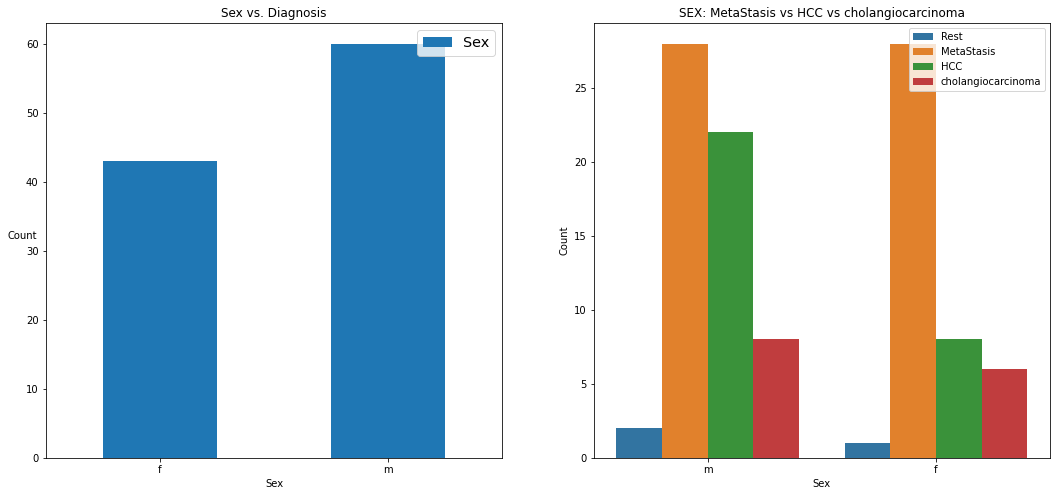

In [8]:
# 0 : Metastasis
# 1 : Hepatocelluar Carcinoma 
# 2 : cholangiocarcinoma 
# -1 : Rest of them
f, ax = plt.subplots(1,2, figsize=(18,8))
patient_meta[['SEX','DX']].groupby(['SEX'], as_index=True).count().plot.bar(ax=ax[0], rot=0)
ax[0].set_title("Sex vs. Diagnosis")
ax[0].set_ylabel('Count',rotation=0)
ax[0].set_xlabel('Sex')
ax[0].legend(['Sex'], loc = 'upper right',fontsize='x-large')

sns.countplot('SEX', hue = 'DX', data=patient_meta, ax=ax[1])
ax[1].set_title('SEX: MetaStasis vs HCC vs cholangiocarcinoma')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sex')
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'upper right')
plt.show()

#### 막대그래프 분석
- 남성의 경우가 전반적인 암 진단률이 높다.
- 주어진 데이터를 기반으로 성별 암 전이(MetaStasis) 발생률은 비슷하지만, HCC 경우 남성의 발병률이 높다.
- HCC 진단에 있어 성별데이터가 중요하다고 판단된다.

### 암 진단별 막대그래프

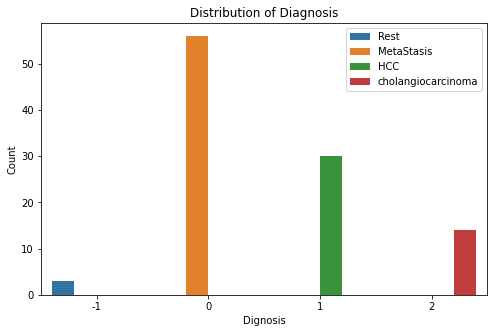

In [9]:
f, ax = plt.subplots(1,1, figsize=(8,5))
sns.countplot('DX', hue = 'DX', data=patient_meta, ax=ax)
ax.set_title("Distribution of Diagnosis")
ax.set_xlabel('Dignosis')
ax.set_ylabel('Count',rotation=90)
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'upper right')

#### 분석
- 암 전이 발병률이 가장 높게 보이고 그 다음으로 HCC로 확인된다.
- 나머지에 해당하는 암 진단 데이터는 Drop 해도 되는가의 판단여부 필요.

### 조영증강 영상 막대그래프 

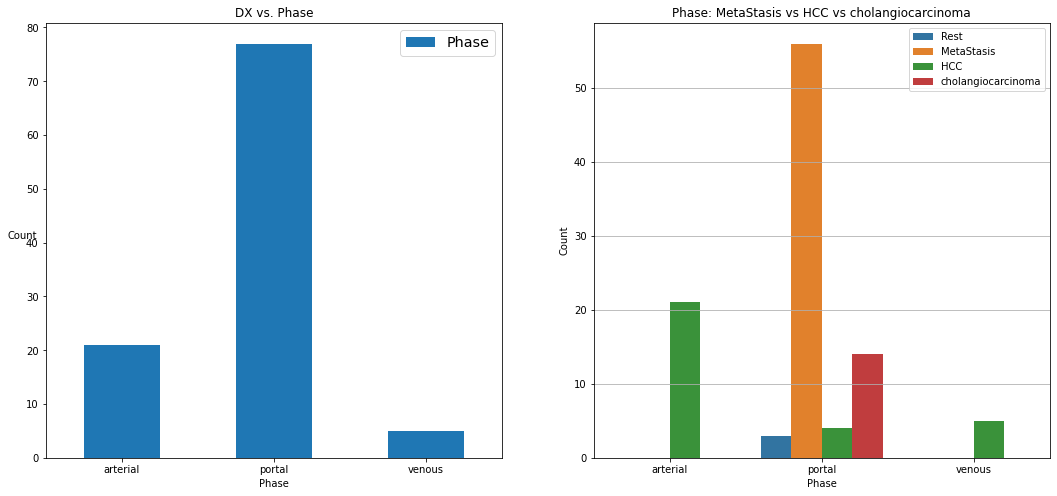

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))
patient_meta[['PHASE','DX']].groupby(['PHASE'], as_index=True).count().plot.bar(ax=ax[0], rot=0)
#ax[0].yaxis.grid(which='major')
ax[0].set_title("DX vs. Phase")
ax[0].set_ylabel('Count',rotation=0)
ax[0].set_xlabel('Phase')
ax[0].legend(['Phase'], loc = 'upper right',fontsize='x-large')

sns.countplot('PHASE', hue = 'DX', data=patient_meta, ax=ax[1])
ax[1].yaxis.grid()
ax[1].set_title('Phase: MetaStasis vs HCC vs cholangiocarcinoma')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Phase')
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'upper right')
plt.show()

### 분석
- portal phase(문맥기) 영상들이 많이 존재한다.
- HCC(간세포암)은 모든 영상의 단계에서 발견된다.
- 문맥기(portal) 영상에서만 암 전이와 담관암(cholangiocarcinoma) 이 발견됨.
- 방향 : phase feature 로 인해 학습시 패턴이 발생할 수 있다. 그러므로 해당 feature를 누락.

### 그래프
1. 성별별 암 진단에 따른 나이분포도.
2. 암 지단별 영상 단계에 따른 나이분포도. 

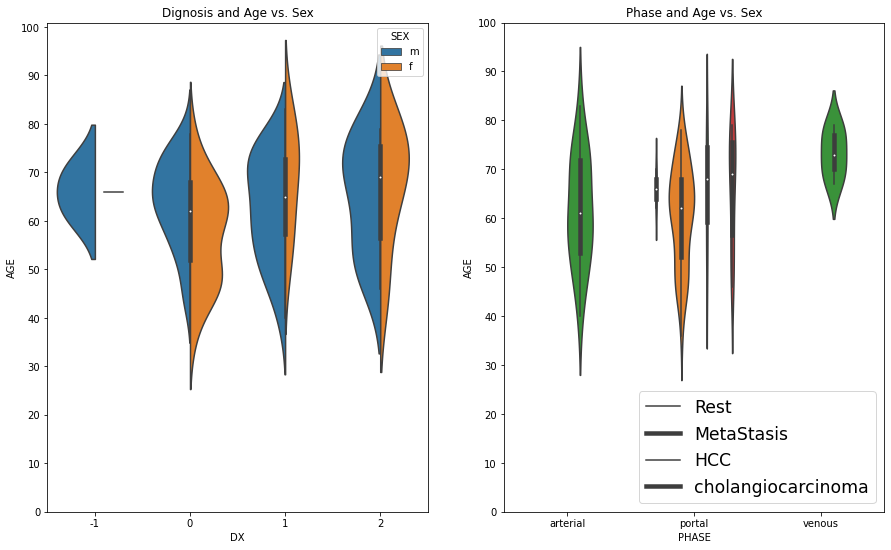

In [11]:
f, ax = plt.subplots(1,2, figsize=(15,9))
sns.violinplot('DX', 'AGE', hue='SEX',data=patient_meta,scale='count',split=True, ax=ax[0])
ax[0].set_title('Dignosis and Age vs. Sex')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('PHASE','AGE',hue='DX',data=patient_meta, scale='count',split=False, ax=ax[1])
ax[1].set_title('Phase and Age vs. Sex')
ax[1].set_yticks(range(0,110,10))
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'lower right',fontsize='xx-large')

plt.show()

#### 분석
- 간세포암의 경우 모든 영상 단계에서 확인가능
- portal phase(문맥기 단계)에서는 60-70대 환자의 암의 전이가 크게 나타난다. 
- 방향 : Phase feature 를 제외하고 모델학습을 실시.

### 나이와 영상단계 별 분포

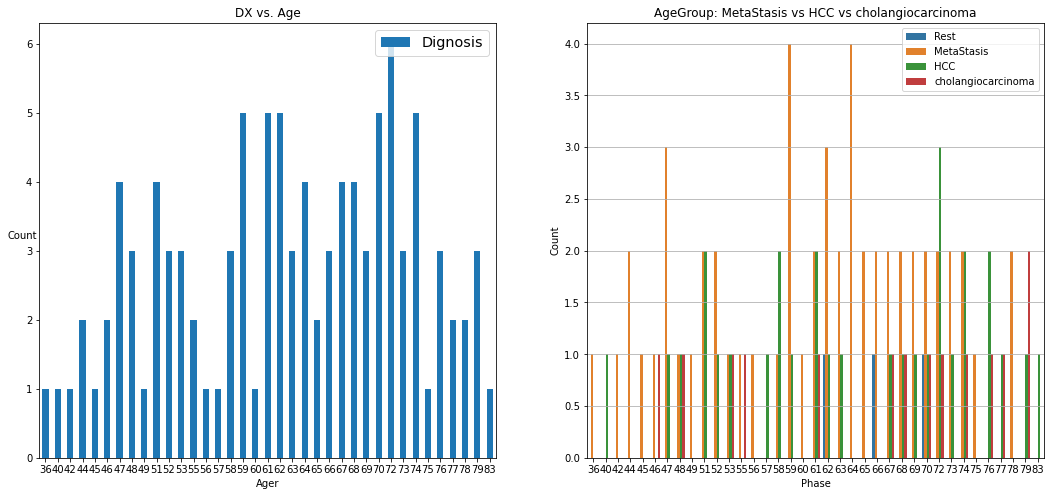

In [12]:
f, ax = plt.subplots(1,2, figsize=(18,8))
patient_meta[['DX','AGE']].groupby(['AGE'], as_index=True).count().plot.bar(ax=ax[0], rot=0)
#ax[0].yaxis.grid(which='major')
ax[0].set_title("DX vs. Age")
ax[0].set_ylabel('Count',rotation=0)
ax[0].set_xlabel('Ager')
ax[0].legend(['Dignosis'], loc = 'upper right',fontsize='x-large')

sns.countplot('AGE', hue = 'DX', data=patient_meta, ax=ax[1])
ax[1].yaxis.grid()
ax[1].set_title('AgeGroup: MetaStasis vs HCC vs cholangiocarcinoma')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Phase')
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'upper right')
plt.show()

In [13]:
# age_group변수 생성
# 0 : 19-34 (청년)
# 1: 35-49 (장년)
# 2: 50-64(중년)
# 3: 65-  (노년)
patient_meta['ageGroup'] = 0
for num in range(patient_meta.shape[0]):
    if(19 <= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <= 34):
        patient_meta.iloc[num,5] = 0 
    elif(35<= patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=49):
        patient_meta.iloc[num,5] = 1 
    elif(50<=patient_meta.iloc[num,2] & patient_meta.iloc[num,2] <=64):
        patient_meta.iloc[num,5] = 2 
    elif(65<=patient_meta.iloc[num,2]):
        patient_meta.iloc[num,5] = 3 
    else:
        patient_meta.iloc[num,5] = -1 

In [14]:
patient_meta.loc[(patient_meta['ageGroup'] == 2) &  (patient_meta['DX']==0)].count()

RANDOM_PT_NO    24
SEX             24
AGE             24
PHASE           24
DX              24
ageGroup        24
dtype: int64

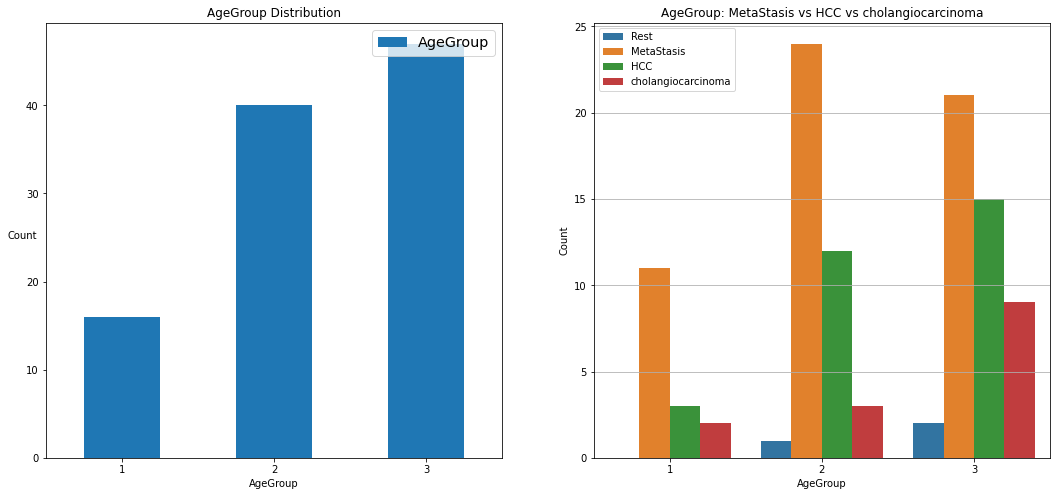

In [15]:
# 0 : 19-34 (청년)
# 1: 35-49 (장년)
# 2: 50-64(중년)
# 3: 65-  (노년)
f, ax = plt.subplots(1,2, figsize=(18,8))
patient_meta[['PHASE','ageGroup']].groupby(['ageGroup'], as_index=True).count().plot.bar(ax=ax[0], rot=0)
#ax[0].yaxis.grid(which='major')
ax[0].set_title("AgeGroup Distribution")
ax[0].set_ylabel('Count',rotation=0)
ax[0].set_xlabel('AgeGroup')
ax[0].legend(['AgeGroup'], loc = 'upper right',fontsize='x-large')

sns.countplot('ageGroup', hue = 'DX', data=patient_meta, ax=ax[1])
ax[1].yaxis.grid()
ax[1].set_title('AgeGroup: MetaStasis vs HCC vs cholangiocarcinoma')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('AgeGroup')
plt.legend(['Rest','MetaStasis','HCC' ,'cholangiocarcinoma'], loc = 'upper left')
plt.show()

#### 분석
- 3 (노년) 그룹의 암진단 발병률이 높다.
- 암 전이 발병률은 2(중년) 그룹이 높고, HCC(간세포암)과 cholangiocarcinoma(담관암)의 발병률은 3(노년) 그룹이 높다.
- 방향 : AgeGroup 을 만드는 것이 accuracy 향상에 도움 되나?

In [16]:
patient_meta.head()

,RANDOM_PT_NO,SEX,AGE,PHASE,DX,ageGroup
0,SN00180816,m,52,arterial,1,2
1,SN00361989,f,51,portal,1,2
2,SN00481545,f,72,portal,2,3
3,SN00493709,m,67,portal,2,3
4,SN00181638,m,59,portal,0,2


In [17]:
### Preprocessing

In [18]:
# Diagnosis
# 0 : arterial 
# 1 : portal : 문맥기
# 2 : venous : 담관암
for r in range(patient_meta.shape[0]):
    if('arterial' == patient_meta.iloc[r, 3]):
        patient_meta.iloc[r, 3] = 0
    elif('portal' == patient_meta.iloc[r, 3]):
        patient_meta.iloc[r, 3] = 1
    elif('venous' == patient_meta.iloc[r, 3]):
        patient_meta.iloc[r, 3] = 2
    else:
        pass

In [19]:
for r in range(patient_meta.shape[0]):
    if('m' == patient_meta.iloc[r, 1]):
        patient_meta.iloc[r, 1] = 0
    else:
        patient_meta.iloc[r, 1] = 1

In [20]:
patient_meta.head()

,RANDOM_PT_NO,SEX,AGE,PHASE,DX,ageGroup
0,SN00180816,0,52,0,1,2
1,SN00361989,1,51,1,1,2
2,SN00481545,1,72,1,2,3
3,SN00493709,0,67,1,2,3
4,SN00181638,0,59,1,0,2


In [21]:
# Continuous Variables(Age)
age = patient_meta['AGE'].values
age_scaled = preprocessing.scale(age)
 
patient_meta['AGE_NORM'] = age_scaled
patient_meta = patient_meta.drop(['AGE'], axis = 1)

# categorical Variables(Sex, Phase)
# pd.get_dummies() 가변수 만들기
patient_meta = pd.concat([patient_meta, pd.get_dummies(patient_meta[['SEX','PHASE','DX']])], axis=1)
patient_meta = patient_meta.drop(['SEX','PHASE'], axis=1)

In [22]:
patient_meta.corr()

,ageGroup,AGE_NORM,SEX_0,SEX_1,PHASE_0,PHASE_1,PHASE_2,DX_-1,DX_0,DX_1,DX_2
ageGroup,1.000000,0.917119,0.134780,-0.134780,-0.044080,-0.067334,0.218736,0.087747,-0.185088,0.087946,0.109355
AGE_NORM,0.917119,1.000000,0.123379,-0.123379,-0.040675,-0.076105,0.230082,0.058087,-0.203650,0.099402,0.135698
SEX_0,0.134780,0.123379,1.000000,-1.000000,0.232946,-0.220003,0.008005,0.029553,-0.182665,0.196044,-0.008924
SEX_1,-0.134780,-0.123379,-1.000000,1.000000,-0.232946,0.220003,-0.008005,-0.029553,0.182665,-0.196044,0.008924
PHASE_0,-0.044080,-0.040675,0.232946,-0.232946,1.000000,-0.870886,-0.114307,-0.087652,-0.552393,0.789412,-0.200711
PHASE_1,-0.067334,-0.076105,-0.220003,0.220003,-0.870886,1.000000,-0.388714,0.100647,0.634288,-0.906446,0.230468
PHASE_2,0.218736,0.230082,0.008005,-0.008005,-0.114307,-0.388714,1.000000,-0.039123,-0.246557,0.352349,-0.089586
DX_-1,0.087747,0.058087,0.029553,-0.029553,-0.087652,0.100647,-0.039123,1.000000,-0.189063,-0.111035,-0.068696
DX_0,-0.185088,-0.203650,-0.182665,0.182665,-0.552393,0.634288,-0.246557,-0.189063,1.000000,-0.699752,-0.432926
DX_1,0.087946,0.099402,0.196044,-0.196044,0.789412,-0.906446,0.352349,-0.111035,-0.699752,1.000000,-0.254254


### Correlation Heatmap

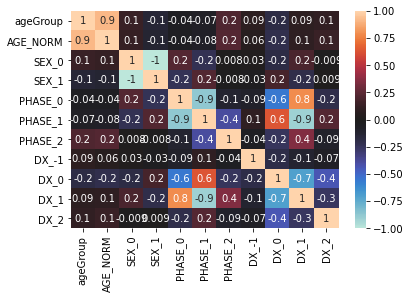

In [23]:
sns.heatmap(patient_meta.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0)

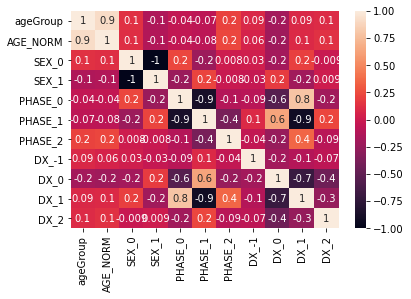

In [24]:
sns.heatmap(patient_meta.corr(), annot = True, fmt='.1g')

#### 분석
- ageGroup 과 normalized age 관계도가 비슷한걸로 보아 둘 중 하나만 사용.
- Phase의 상관관계가 확인됨.

### Decision Tree 통한 Feature Importance 비교

In [25]:
from keras.utils import to_categorical

In [26]:
path = '../Code/benchmark_liver_tumor/raw/np/'
feature_name_list = ['SEX_f', 'SEX_m', 'PHASE_arterial', 'PHASE_portal', 'PHASE_venous', 'AGE_norm']
X_p_tr, X_m_tr, X_i_tr, Y_tr = np.load(path+'X_p_tr.npy'), np.load(path+'X_m_tr.npy', allow_pickle=True), np.load(path+'X_i_tr.npy'), np.load(path+'Y_tr.npy')
X_p_te, X_m_te, X_i_te, Y_te = np.load(path+'X_p_te.npy'), np.load(path+'X_m_te.npy', allow_pickle=True), np.load(path+'X_i_te.npy'), np.load(path+'Y_te.npy')
X_m_tr, X_m_te = X_m_tr.astype('float32'), X_m_te.astype('float32')
Y_tr_cat, Y_te_cat = to_categorical(Y_tr), to_categorical(Y_te)
print(X_p_tr.shape, X_m_tr.shape, X_i_tr.shape, Y_tr.shape, Y_tr_cat.shape)
print(X_p_te.shape, X_m_te.shape, X_i_te.shape, Y_te.shape, Y_te_cat.shape)

(10490,) (10490, 6) (10490, 5, 32, 32) (10490,) (10490, 3)
(2917,) (2917, 6) (2917, 5, 32, 32) (2917,) (2917, 3)


In [28]:
!pip install graphviz

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [30]:
# Build Decition Tree for Meta Data
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_m_tr, Y_tr)
Y_tr_hat, Y_te_hat = dt.predict(X_m_tr), dt.predict(X_m_te)

In [31]:
# Visualize DTs
from sklearn import tree
import graphviz
feature_name_list = ['SEX_f', 'SEX_m', 'PHASE_arterial', 'PHASE_portal', 'PHASE_venous', 'AGE_norm']
dt_dot = tree.export_graphviz(dt, out_file=None, feature_names=feature_name_list, filled=True)

( 0) Feature: SEX_f, Score: 0.03267
( 1) Feature: SEX_m, Score: 0.07586
( 2) Feature: PHASE_arterial, Score: 0.00000
( 3) Feature: PHASE_portal, Score: 0.52953
( 4) Feature: PHASE_venous, Score: 0.00000
( 5) Feature: AGE_norm, Score: 0.36195


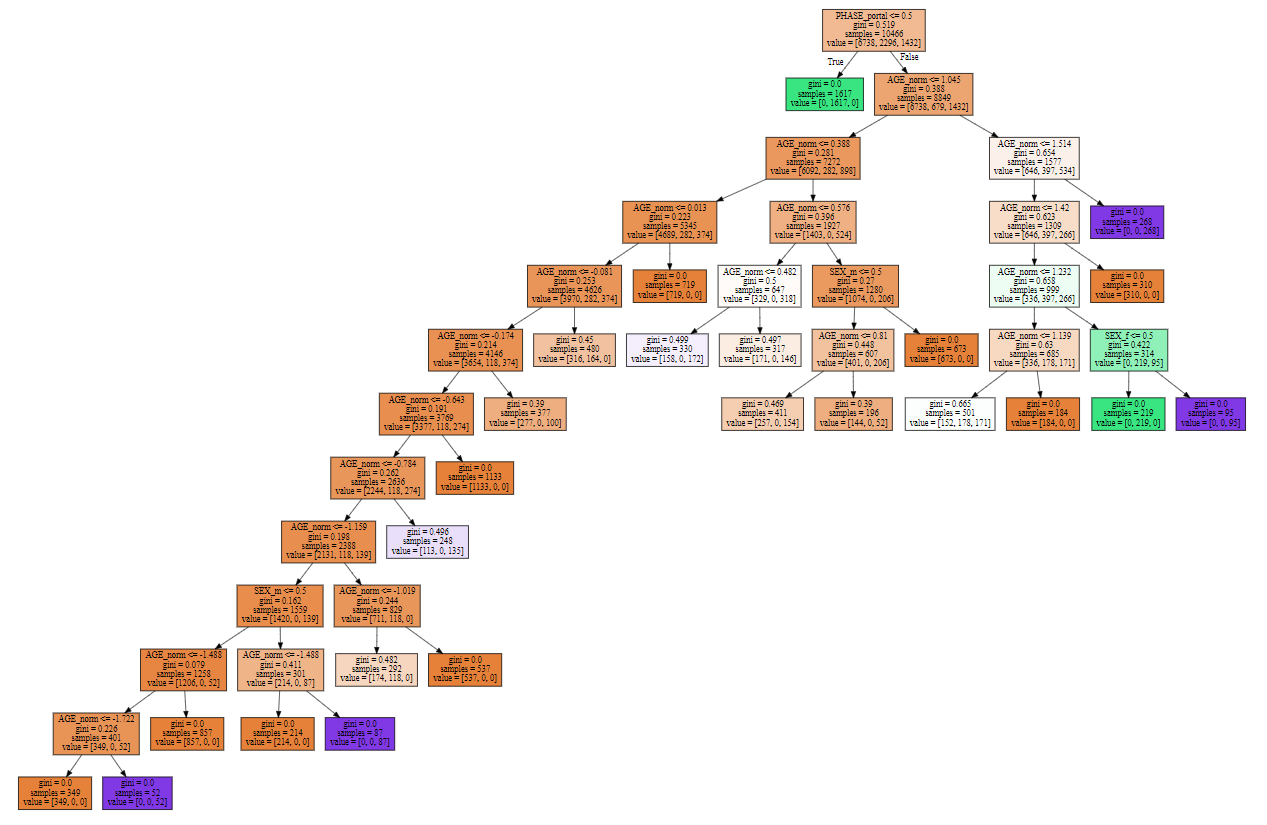

In [36]:
# Feature Importance
from IPython.display import display, Image
dt_feature_importance = dt.feature_importances_
for i, v in enumerate(dt_feature_importance):
    print('(%2d) Feature: %s, Score: %.5f' %(i, feature_name_list[i], v))

# graphviz.Source(dt_dot, format='png')
display(Image(filename="./model/Decision Tree.png"))


### Self Organized Map

In [ ]:
!pip install SimpSOM

In [33]:
# Load Dataset
path= '../Code/benchmark_liver_tumor/raw/np/'
feature_name_list = ['SEX_f', 'SEX_m', 'PHASE_arterial', 'PHASE_portal', 'PHASE_venous', 'AGE_norm']
X_p_tr, X_m_tr, X_i_tr, Y_tr = np.load(path+'X_p_tr.npy'), np.load(path+'X_m_tr.npy', allow_pickle=True), np.load(path+'X_i_tr.npy'), np.load(path+'Y_tr.npy')
X_p_te, X_m_te, X_i_te, Y_te = np.load(path+'X_p_te.npy'), np.load(path+'X_m_te.npy', allow_pickle=True), np.load(path+'X_i_te.npy'), np.load(path+'Y_te.npy')
X_m_tr, X_m_te = X_m_tr.astype('float32'), X_m_te.astype('float32')
Y_tr_cat, Y_te_cat = to_categorical(Y_tr), to_categorical(Y_te)
print(X_p_tr.shape, X_m_tr.shape, X_i_tr.shape, Y_tr.shape, Y_tr_cat.shape)
print(X_p_te.shape, X_m_te.shape, X_i_te.shape, Y_te.shape, Y_te_cat.shape)

(10490,) (10490, 6) (10490, 5, 32, 32) (10490,) (10490, 3)
(2917,) (2917, 6) (2917, 5, 32, 32) (2917,) (2917, 3)


In [34]:
# Build and Train SOM Network
import SimpSOM
som = SimpSOM.somNet(20, 20, np.concatenate((X_m_tr, X_m_te), axis=0), PBC=True)
som.train(0.01, 3000)
som.save('../Code/output_SOM')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


SEX_f 0


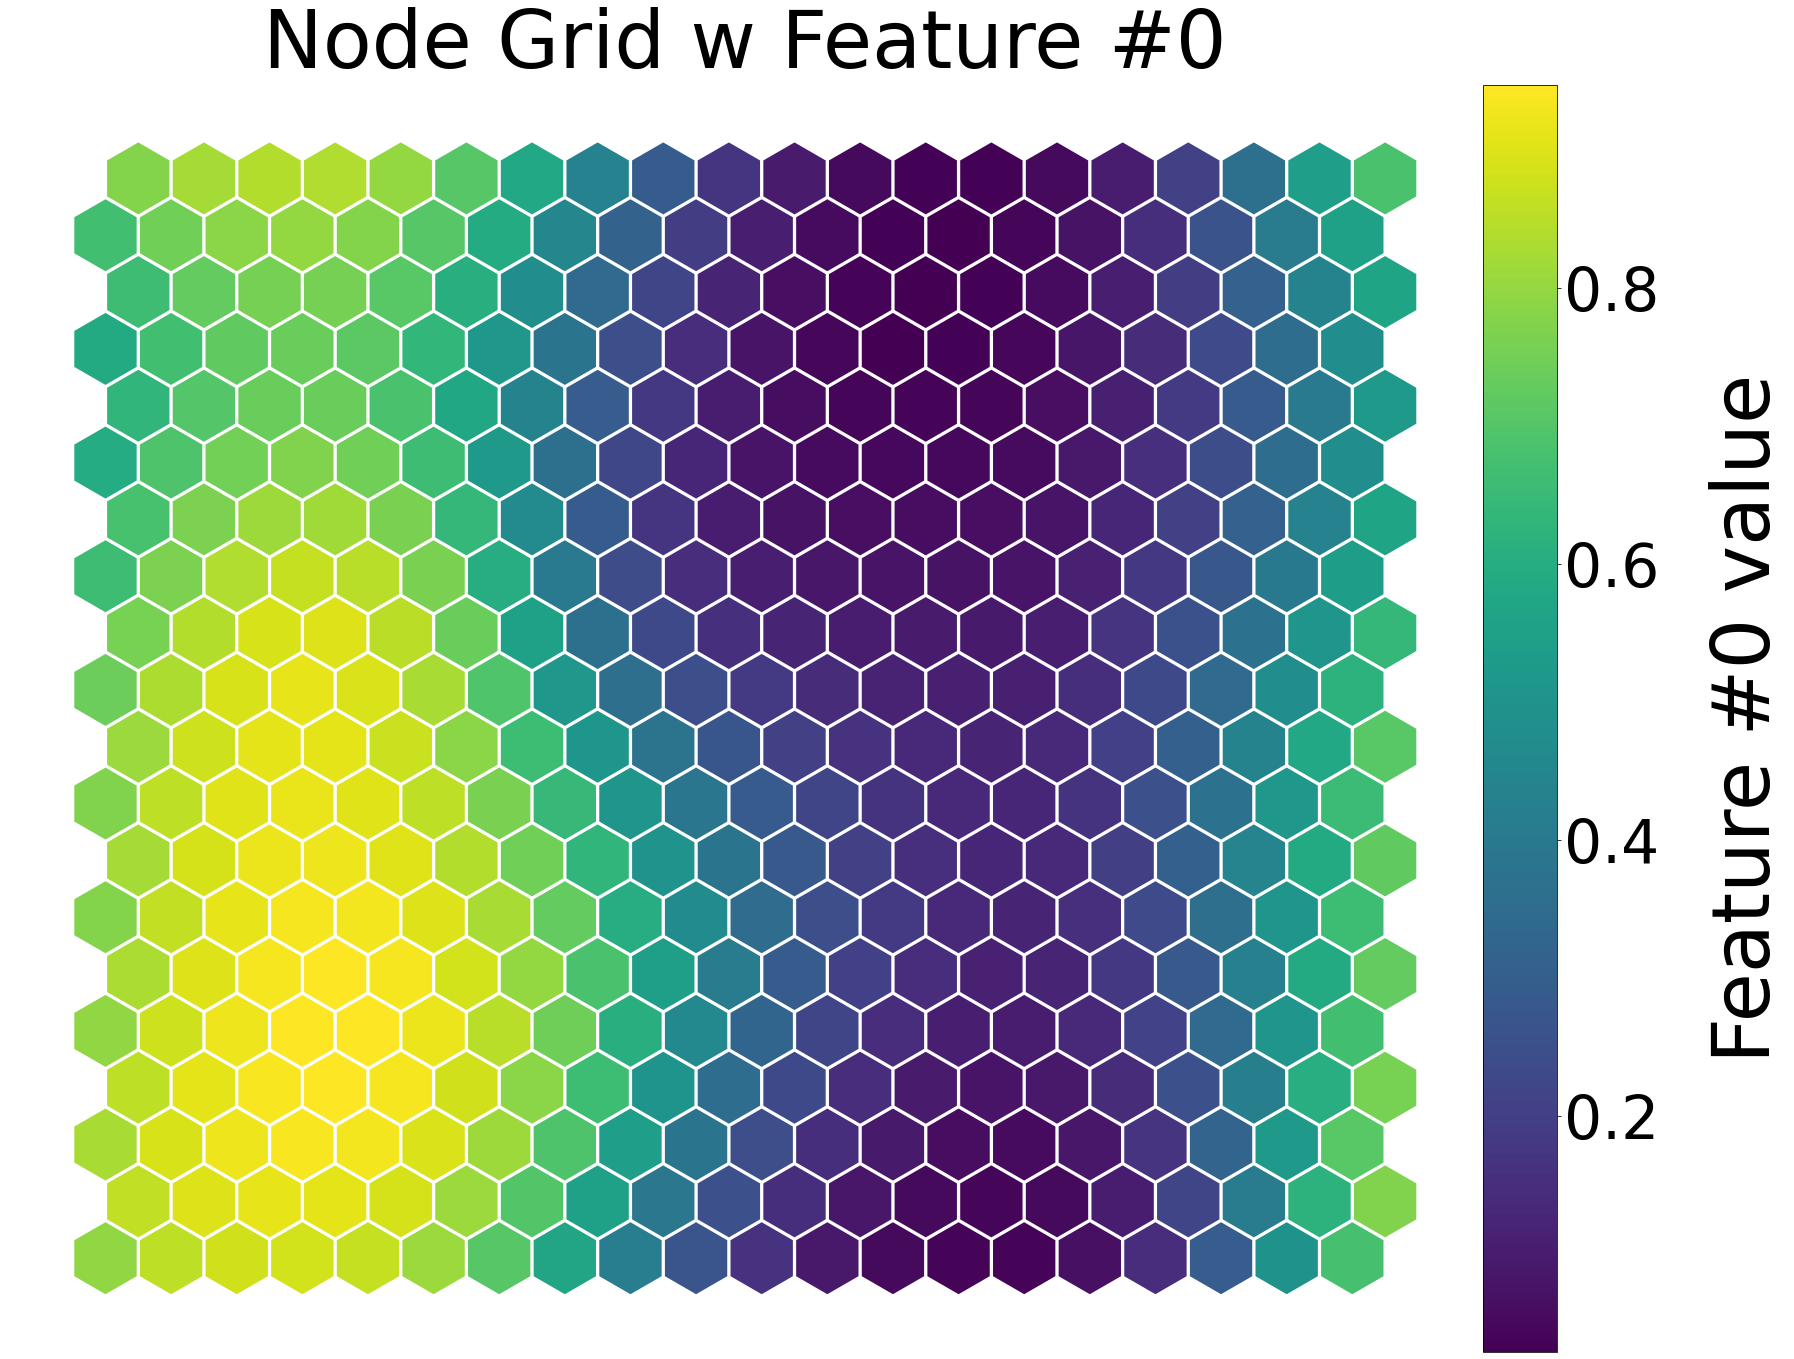

SEX_m 1


<Figure size 432x288 with 0 Axes>

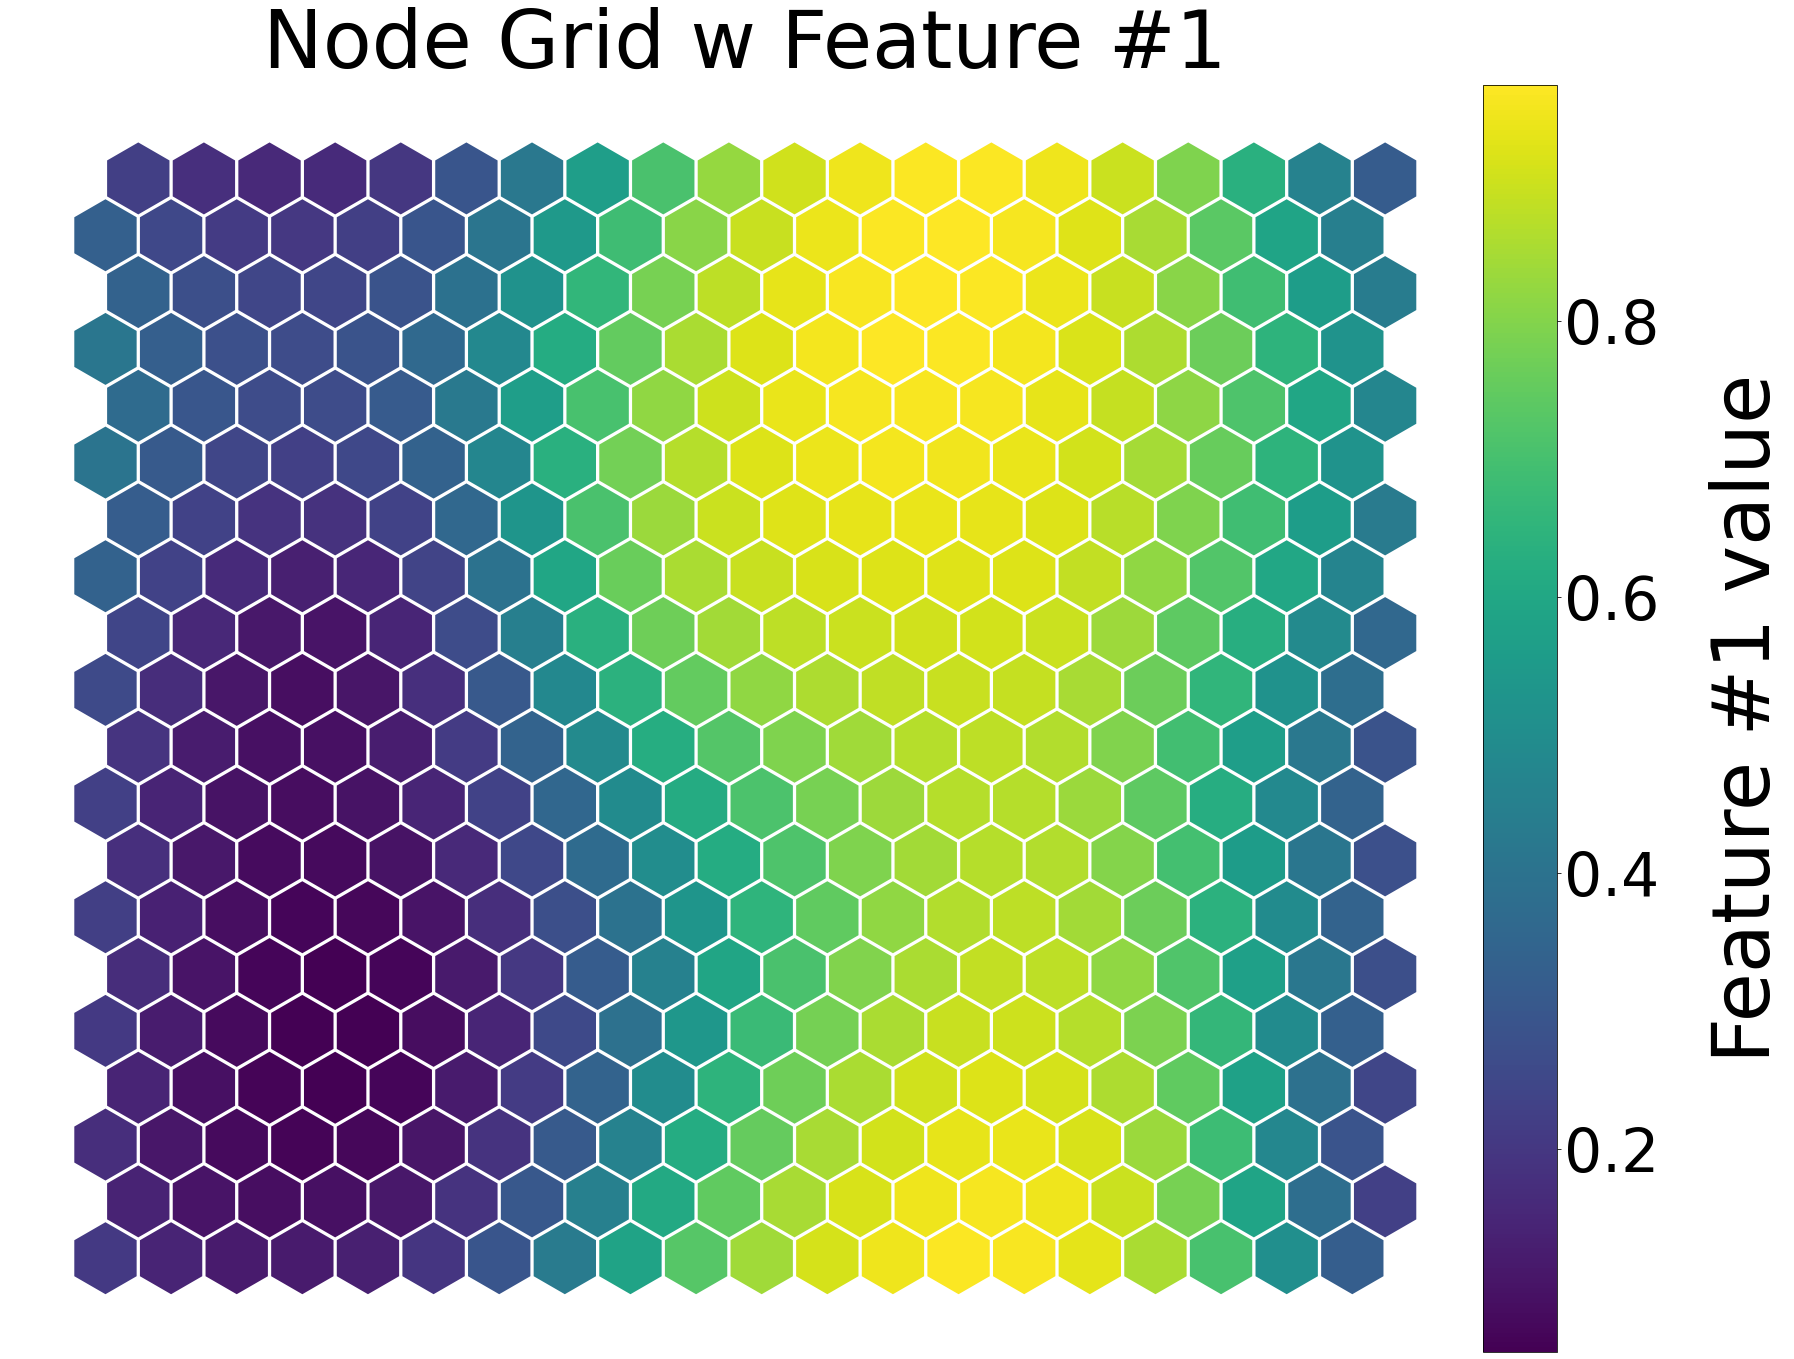

PHASE_arterial 2


<Figure size 432x288 with 0 Axes>

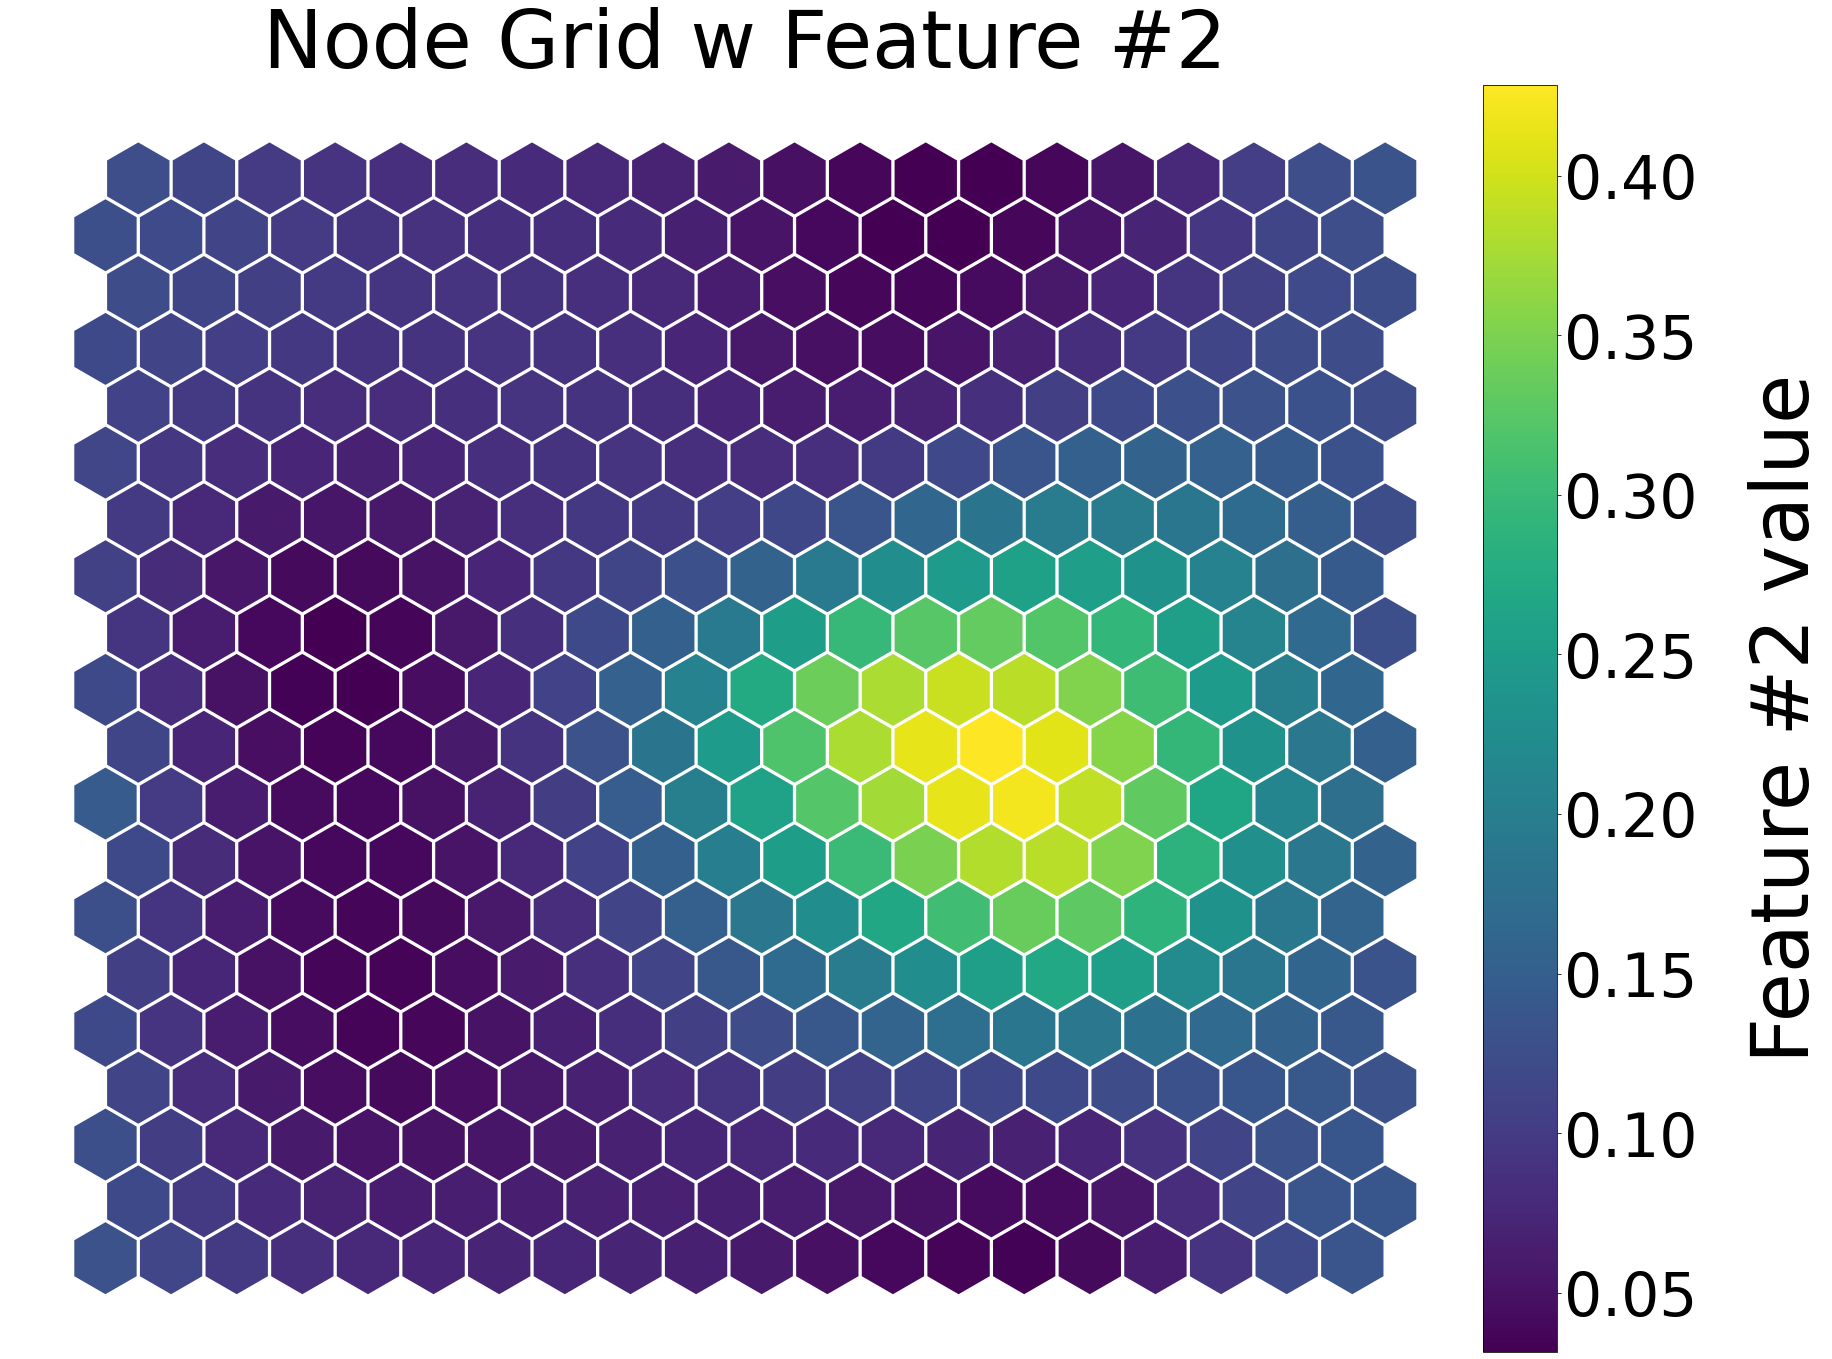

PHASE_portal 3


<Figure size 432x288 with 0 Axes>

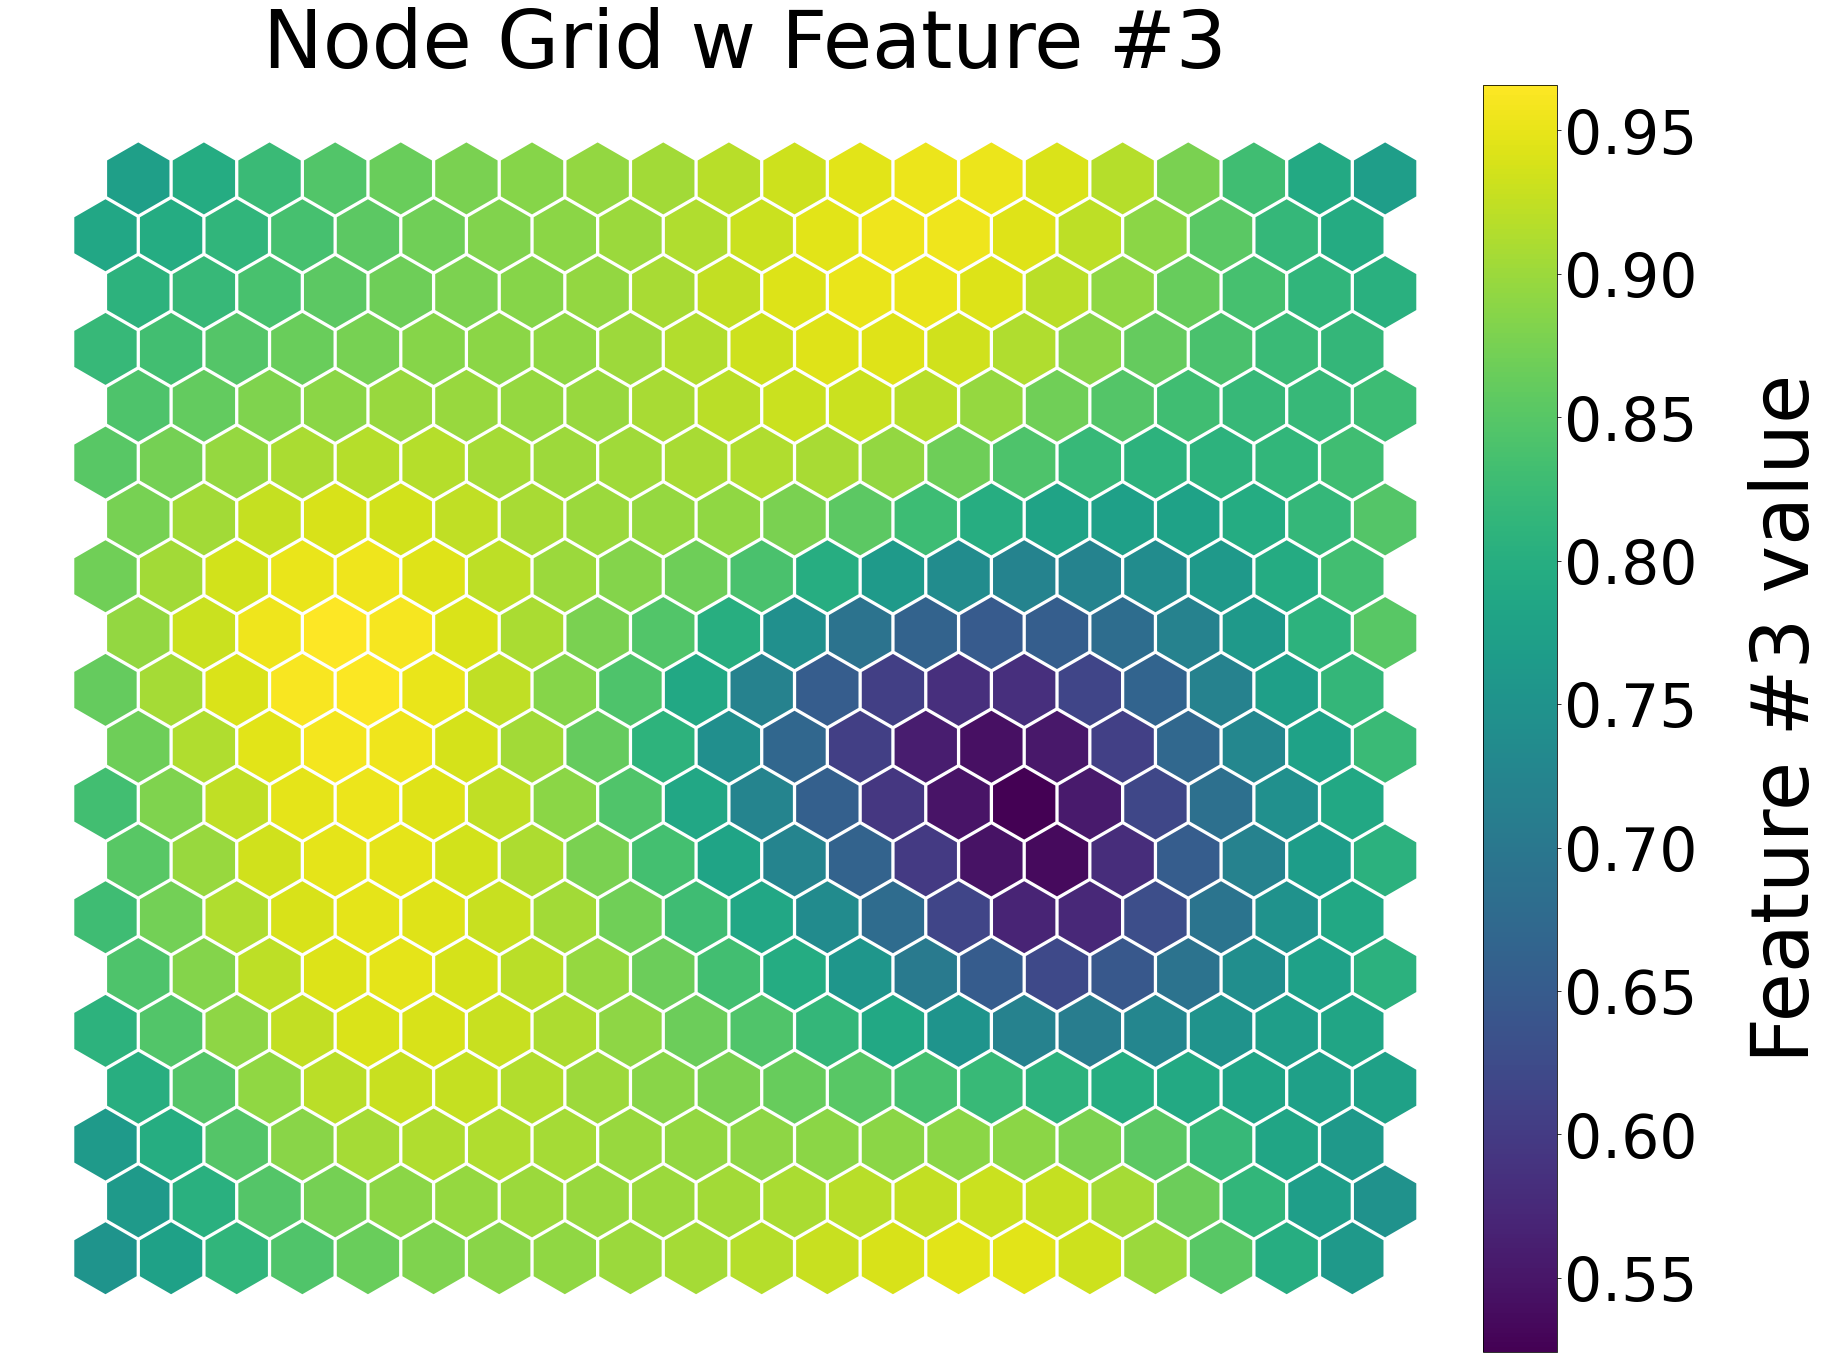

PHASE_venous 4


<Figure size 432x288 with 0 Axes>

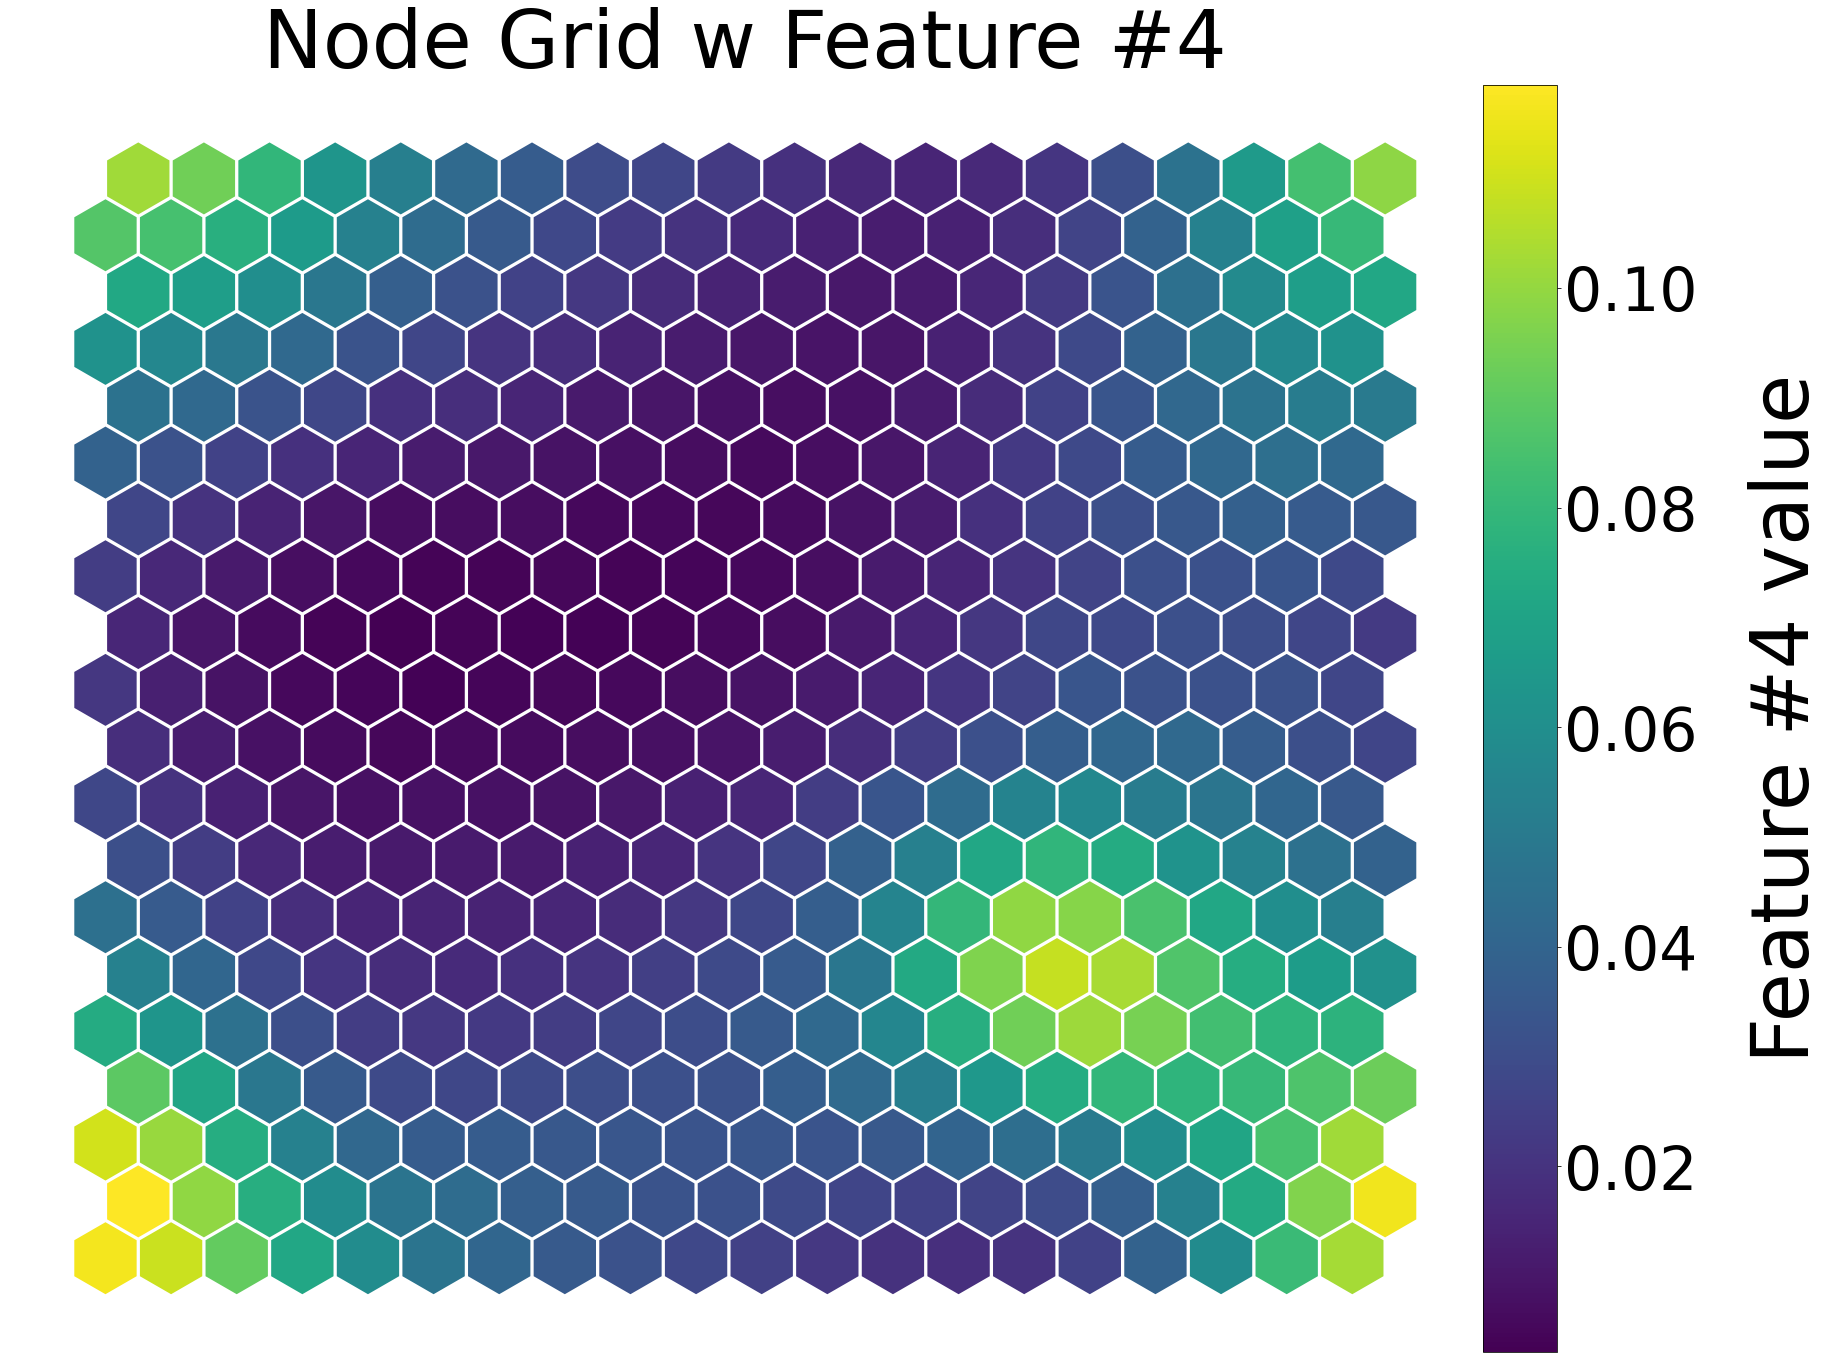

AGE_norm 5


<Figure size 432x288 with 0 Axes>

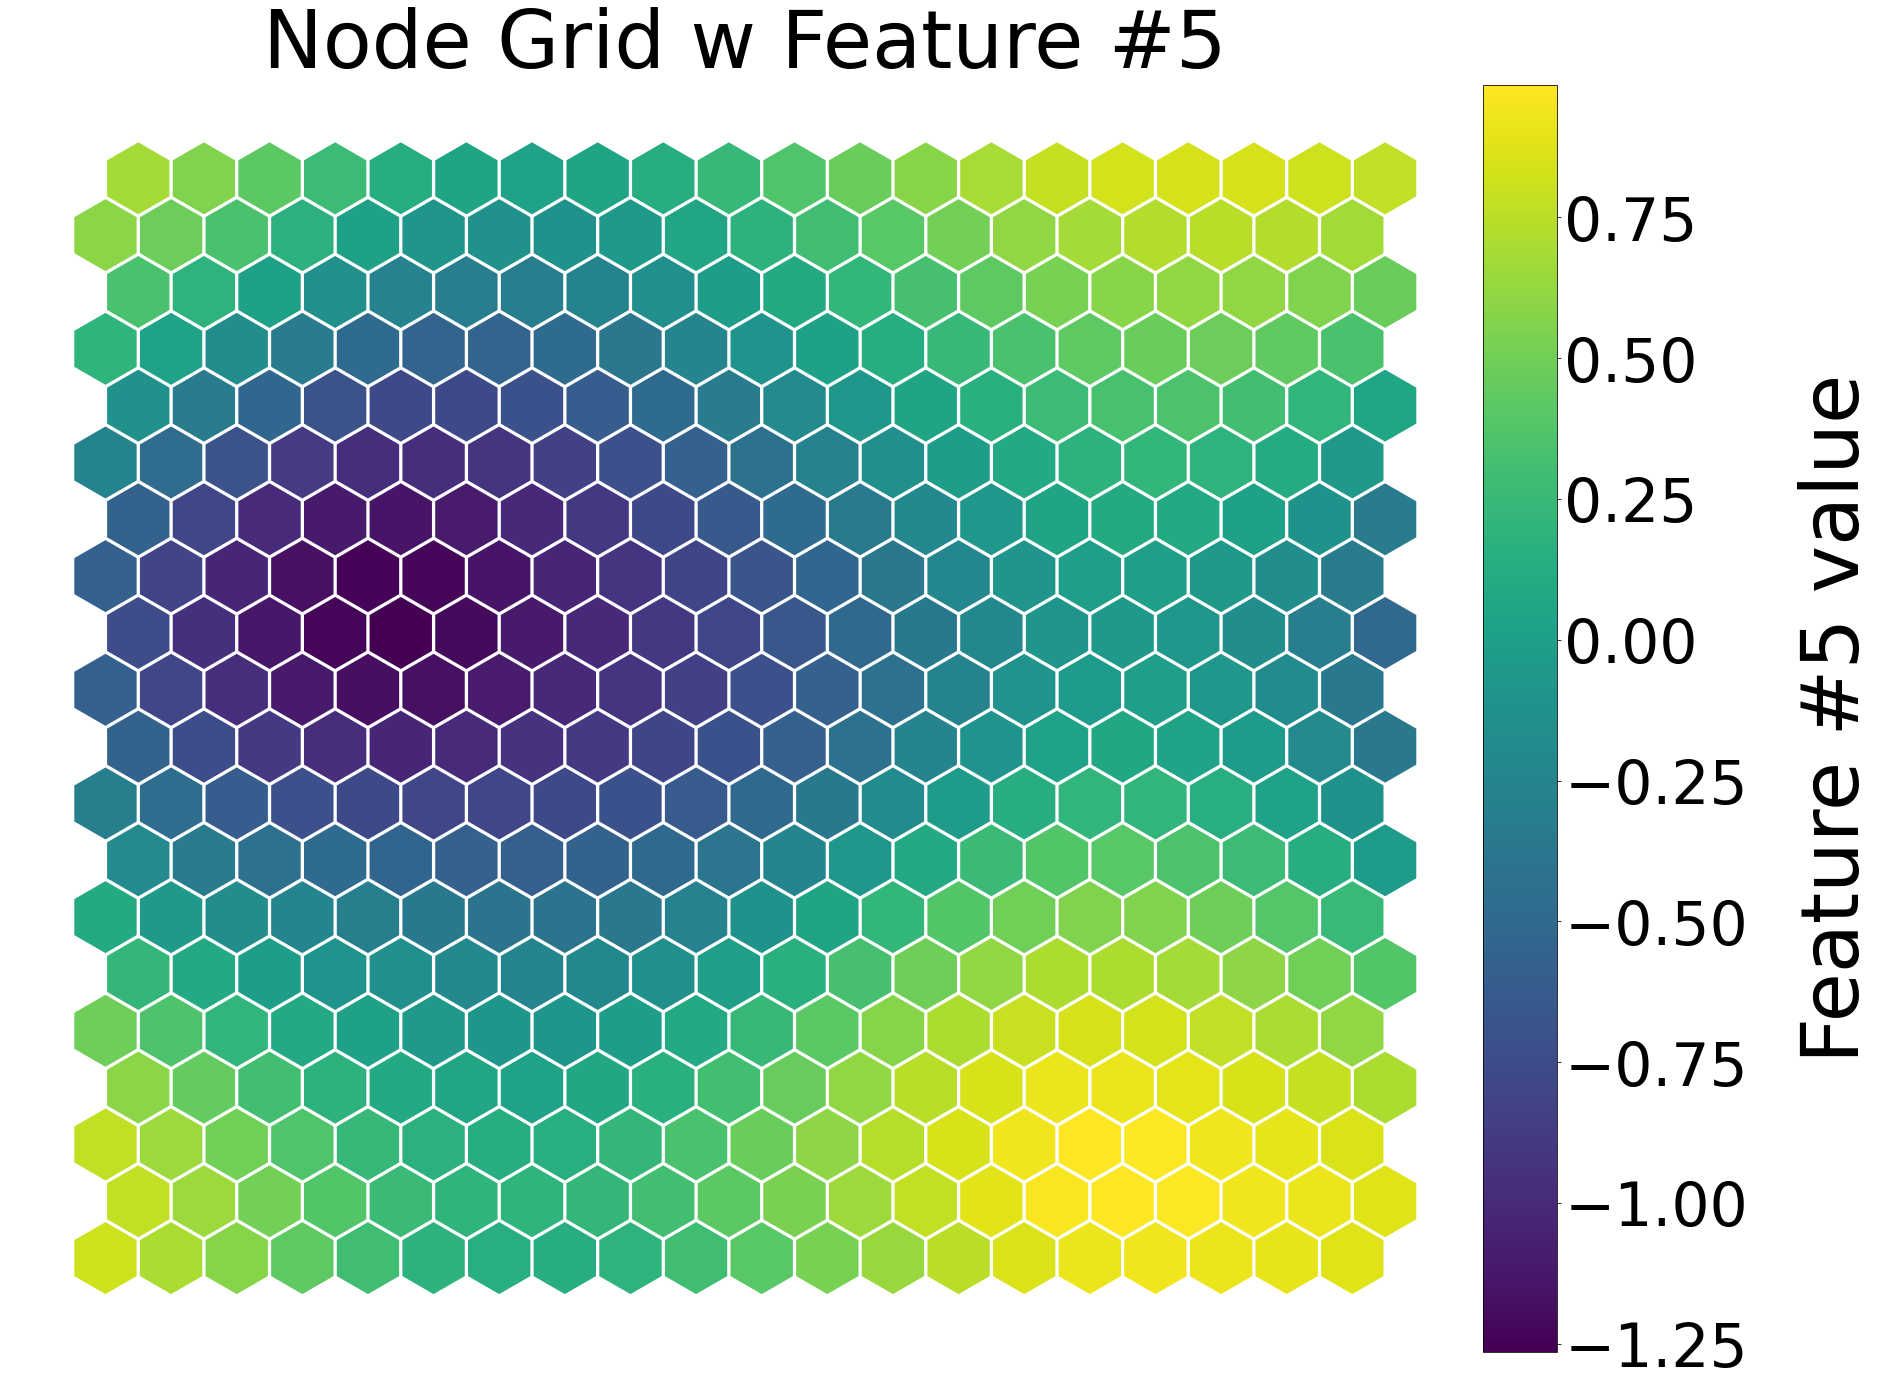

<Figure size 432x288 with 0 Axes>

In [35]:
# Key Features and Self-organizing Maps
for i, c in enumerate(feature_name_list):
    print(feature_name_list[i], i)
    som.nodes_graph(colnum=i, show=True, printout=True, path='../Code/output_SOM')